Initial grid world:
- - - T 
- O - - 
A O - - 
- - - - 
Final grid world with optimal path:
- - - T 
- O - - 
A O - - 
- - - - 

- - - T 
A O - - 
- O - - 
- - - - 

A - - T 
- O - - 
- O - - 
- - - - 

- A - T 
- O - - 
- O - - 
- - - - 

- - A T 
- O - - 
- O - - 
- - - - 

- - - T 
- O - - 
- O - - 
- - - - 

Optimal path: [[2, 0], [1, 0], [0, 0], [0, 1], [0, 2], [0, 3]]

Q-values table:
State (0, 0): U:-7.67 D:-7.78 L:-7.72 R:-7.66
State (0, 1): U:-8.19 D:-8.09 L:-7.97 R:-7.78
State (0, 2): U:-8.71 D:-8.40 L:-8.22 R:-7.89
State (0, 3): U:-9.23 D:-8.71 L:-8.47 R:-8.01
State (1, 0): U:-7.89 D:-8.20 L:-8.21 R:-8.08
State (1, 1): U:-8.41 D:-8.51 L:-8.47 R:-8.19
State (1, 2): U:-8.93 D:-8.82 L:-8.72 R:-8.31
State (1, 3): U:-9.45 D:-9.13 L:-8.97 R:-8.43
State (2, 0): U:-8.11 D:-8.62 L:-8.71 R:-8.50
State (2, 1): U:-8.63 D:-8.93 L:-8.96 R:-8.61
State (2, 2): U:-9.15 D:-9.24 L:-9.22 R:-8.73
State (2, 3): U:-9.67 D:-9.55 L:-9.47 R:-8.85
State (3, 0): U:-8.33 D:-9.04 L:-9.21 R:-8.91
State (3

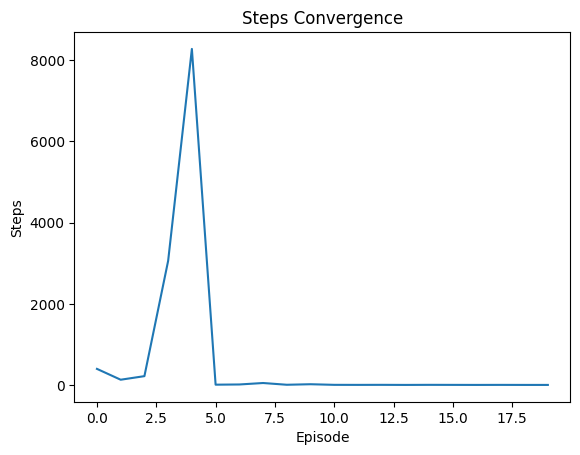

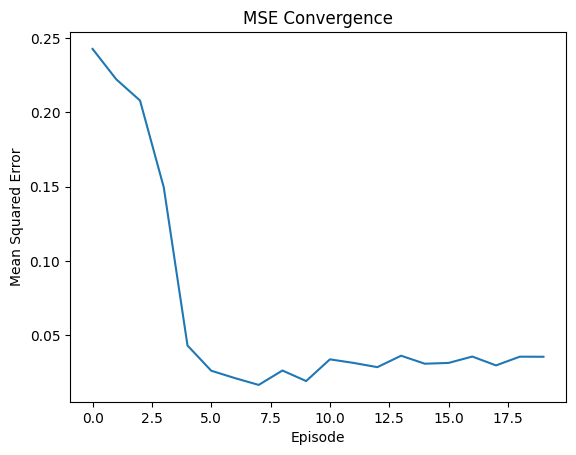

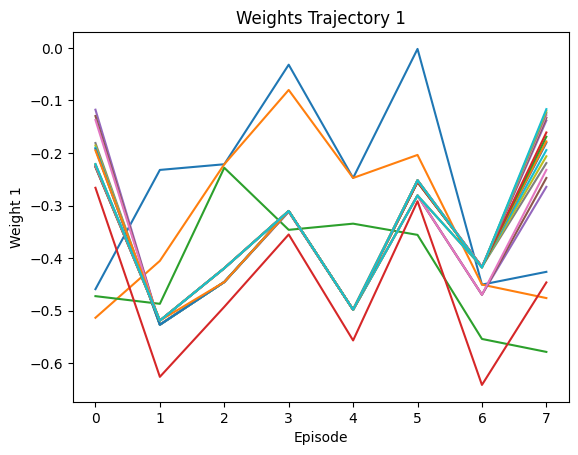

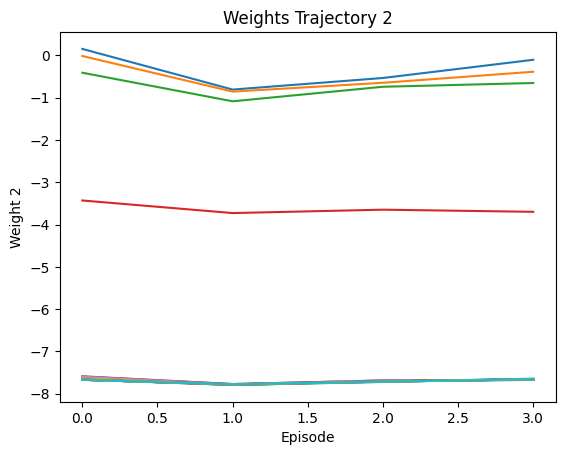

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the GridWorld environment class
class GridWorld:
    def __init__(self, rows, cols, terminal_states,obstacles):
        """
        Initializes a new GridWorld object with the specified number of rows and columns,
        and the set of terminal states.

        Args:
        - rows (int): The number of rows in the grid.
        - cols (int): The number of columns in the grid.
        - terminal_states (list of tuples): A list of (row, col) tuples representing the terminal states.
        """
        self.rows = rows
        self.cols = cols
        self.terminal_states = terminal_states
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        """
        Resets the environment to its initial state, and returns the starting position.

        Returns:
        - agent_pos (list of int): A list of two integers representing the row and column of the starting position.
        """
        self.agent_pos = [2, 0]
        return self.agent_pos

    def step(self, action):
        """
        Takes a step in the environment by performing the specified action, and returns the resulting state, reward, and
        terminal status.

        Args:
        - action (int): The action to perform. 0 = up, 1 = down, 2 = left, 3 = right.

        Returns:
        - state (list of int): A list of two integers representing the row and column of the new state.
        - reward (int): The reward received for the current step.
        - is_terminal (bool): True if the new state is a terminal state, False otherwise.
        """
        next_pos = self.agent_pos.copy()

        if action == 0:  # up
            next_pos[0] = max(0, self.agent_pos[0] - 1)
        elif action == 1:  # down
            next_pos[0] = min(self.rows - 1, self.agent_pos[0] + 1)
        elif action == 2:  # left
            next_pos[1] = max(0, self.agent_pos[1] - 1)
        elif action == 3:  # right
            next_pos[1] = min(self.cols - 1, self.agent_pos[1] + 1)

        # Update the agent's position only if the next position is not an obstacle
        if tuple(next_pos) not in self.obstacles:
            self.agent_pos = next_pos

        # Calculate the new state, reward, and terminal status after taking the action
        state = self.agent_pos.copy()
        is_terminal = tuple(self.agent_pos) in self.terminal_states
        reward = -1 if not is_terminal else 0

        return state, reward, is_terminal


def print_grid(env, agent_pos):
    """
    Prints a grid representation of the environment, with the current position of the agent marked with an 'A' character.

    Args:
    - env (GridWorld object): The environment to print.
    - agent_pos (list of int): A list of two integers representing the row and column of the agent's position.
    """
    for row in range(env.rows):
        row_str = ""
        for col in range(env.cols):
            if (row, col) in env.terminal_states:
                row_str += "T "
            elif (row, col) in env.obstacles:
                row_str += "O "
            elif [row, col] == agent_pos:
                row_str += "A "
            else:
                row_str += "- "
        print(row_str)


class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        """
        Initializes a new QNetwork object with the specified input and output dimensions.

        Args:
        - input_dim (int): The number of input neurons in the network.
        - output_dim (): The number of output neurons in the network.
        """
        super(QNetwork, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        """
        Computes a forward pass through the network.

        Args:
        - x (tensor): The input tensor to the network.

        Returns:
        - output (tensor): The output tensor from the network.
        """
        return self.fc(x)


def state_to_input(state):
    """
    Converts a state representation into a PyTorch tensor.

    Args:
    - state (list of int): A list of two integers representing the row and column of the state.

    Returns:
    - input_tensor (tensor): A PyTorch tensor representing the state.
    """
    return torch.tensor(state, dtype=torch.float32).unsqueeze(0)
def print_q_values_table(q_net, env):
    for row in range(env.rows):
        for col in range(env.cols):
            state_input = state_to_input([row, col])
            q_values = q_net(state_input)
            print(f"State ({row}, {col}): U:{q_values[0, 0]:.2f} D:{q_values[0, 1]:.2f} L:{q_values[0, 2]:.2f} R:{q_values[0, 3]:.2f}")
    print()

def plot_steps_convergence(steps_list):
    plt.plot(steps_list)
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.title("Steps Convergence")
    plt.show()

def train_agent(env, q_net, episodes, learning_rate, discount_factor, exploration_rate, mse_threshold=1e-4):
    """
    Trains a Q-network agent to learn the optimal policy for the given environment.

    Args:
    - env (GridWorld object): The environment to train the agent on.
    - q_net (QNetwork object): The Q-network to train.
    - episodes (int): The number of training episodes to run.
    - learning_rate (float): The learning rate to use for training.
    - discount_factor (float): The discount factor to use for computing future rewards.
    - exploration_rate (float): The probability of taking a random action during training.
    - mse_threshold (float): The minimum change in MSE required to continue training.

    Returns:
    - mse_list (list of float): A list of the MSE for each episode during training.
    - weights_list (list of lists of tensors): A list of the network weights after each episode during training.
    """
    optimizer = optim.SGD(q_net.parameters(), lr=learning_rate)
    mse_loss = nn.MSELoss()
    mse_list = []
    weights_list = []
    steps_list = []

    for episode in range(episodes):
        state = env.reset()
        is_terminal = False
        episode_mse = []
        steps = 0

        while not is_terminal:
            state_input = state_to_input(state)
            q_values = q_net(state_input)
            action = np.argmax(q_values.detach().numpy())
            steps += 1
            if np.random.rand() < exploration_rate:
                non_best_actions = [idx for idx, value in enumerate(q_values.detach().numpy()[0]) if idx != action]
                action = np.random.choice(non_best_actions)

            next_state, reward, is_terminal = env.step(action)
            next_state_input = state_to_input(next_state)
            next_q_values = q_net(next_state_input)

            target_q_values = q_values.clone()
            target_q_values[0, action] = reward + discount_factor * torch.max(next_q_values)

            loss = mse_loss(q_values, target_q_values)
            episode_mse.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            state = next_state
        steps_list.append(steps)
        mse_list.append(np.mean(episode_mse))
        weights_list.append([w.clone().detach().numpy() for w in q_net.parameters()])

        # Stopping condition based on the change in mean squared error
        if len(mse_list) > 1 and abs(mse_list[-1] - mse_list[-2]) < mse_threshold:
            break

    return mse_list, weights_list, steps_list

def test_agent(env, q_net):
    """
    Tests the agent on the given environment to find the optimal path.

    Args:
    - env (GridWorld object): The environment to test the agent on.
    - q_net (QNetwork object): The Q-network to use for action selection.

    Returns:
    - path (list of lists of int): A list of states visited during the optimal path.
    """
    state = env.reset()
    path = [state]
    is_terminal = False

    while not is_terminal:
        state_input = state_to_input(state)
        q_values = q_net(state_input)
        action = np.argmax(q_values.detach().numpy())
        next_state, _, is_terminal = env.step(action)
        path.append(next_state)
        state = next_state

    return path

# Create a new GridWorld object
grid_world = GridWorld(4, 4, [(0, 3)], [(1, 1), (2, 1)])

# Define the input and output dimensions of the Q-network
state_size = 2
action_size = 4

# Create a new QNetwork object
q_network = QNetwork(state_size, action_size)

# Define the hyperparameters for training
episodes =3000
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 0.1

# Print the initial state of the GridWorld
print("Initial grid world:")
print_grid(grid_world, grid_world.agent_pos)

# Train the agent on the GridWorld environment
mse_list, weights_list, steps_list = train_agent(grid_world, q_network, episodes, learning_rate, discount_factor, exploration_rate)
 
# Test the agent on the GridWorld environment to find the optimal path
optimal_path = test_agent(grid_world, q_network)


# Print the final state of the GridWorld with the optimal path
print("Final grid world with optimal path:")
for position in optimal_path:
    print_grid(grid_world, position)
    print()

# Test the agent on the GridWorld environment to find the optimal path
optimal_path = test_agent(grid_world, q_network)
print("Optimal path:", optimal_path)

# Print the Q-values table and plot the number of steps taken during training
print("\nQ-values table:")
print_q_values_table(q_network, grid_world)
print("Steps taken during training:")
plot_steps_convergence(steps_list)

# Plot the MSE convergence during training
plt.plot(mse_list)
plt.xlabel("Episode")
plt.ylabel("Mean Squared Error")
plt.title("MSE Convergence")
plt.show()

# Plot the trajectory of each weight during training
for idx, weights in enumerate(zip(*weights_list)):
    plt.figure()
    for weight in weights:
        plt.plot(weight.flatten())
    plt.xlabel("Episode")
    plt.ylabel(f"Weight {idx + 1}")
    plt.title(f"Weights Trajectory {idx + 1}")
    plt.show()




